## What is Exploratory Data Analysis ?
EDA or Exploratory Data Analysis is very initial stage of Data Analysis . We try to consider main variables of the data and get some insights from the Data by studying its  main charateristics to answer the bigger question.

## Why EDA?
1) We simply can’t make sense of such huge datasets if we don’t explore the data.

2) Exploring and analyzing the data is important to see how features are contributing to the target variable, identifying anomalies and outliers to treat them lest they affect our model, to study the nature of the features, and be able to perform data cleaning so that our model building process is as efficient as possible.

3) If we don’t perform exploratory data analysis, we won’t be able to find inconsistent or incomplete data that may pose trends incorrectly to our model.

4) From a business point of view, business stakeholders often have certain assumptions about data. Exploratory Data Analysis helps us look deeper and see if our intuition matches with the data. It helps us see if we are asking the right questions.

5) This step also serves as the basis for answering our business questions.

## Here we are taking NYC Taxi Duration Data set to understand more about EDA .

## Importing necessary libraries 

In [4]:
import pandas as pd   # To work with data frames and for data processing
import numpy as np    # To work with arrays and linear algebra .

In [3]:
# Data Visualisation Libraries 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()     # For default theme of seaborn
%matplotlib inline

In [9]:
#importing the dataset 
data = pd.read_csv("D:/Data Sets/nyc_taxi_trip_duration.csv")

In [10]:
print(data.head())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1  id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2  id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3  id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4  id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.771164                  N            400  
1         40.694

In [11]:
print(data.columns)

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [12]:
print(data.shape) 

(729322, 11)


In [16]:
# For the data types of the columns 
print(data.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [17]:
print(data.head())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id1080784          2  2016-02-29 16:40:21  2016-02-29 16:47:01   
1  id0889885          1  2016-03-11 23:35:37  2016-03-11 23:53:57   
2  id0857912          2  2016-02-21 17:59:33  2016-02-21 18:26:48   
3  id3744273          2  2016-01-05 09:44:31  2016-01-05 10:03:32   
4  id0232939          1  2016-02-17 06:42:23  2016-02-17 06:56:31   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.953918        40.778873         -73.963875   
1                2        -73.988312        40.731743         -73.994751   
2                2        -73.997314        40.721458         -73.948029   
3                6        -73.961670        40.759720         -73.956779   
4                1        -74.017120        40.708469         -73.988182   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.771164                  N            400  
1         40.694

In [18]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


 ## Independent Variables
1) id — a unique identifier for each trip
2) vendor_id — a code indicating the provider associated with the trip record
3) pickup_datetime — date and time when the meter was engaged
4) dropoff_datetime — date and time when the meter was disengaged
5) passenger_count — the number of passengers in the vehicle (driver entered value)
6) pickup_longitude — the longitude where the meter was engaged
7) pickup_latitude — the latitude where the meter was engaged
8) dropoff_longitude — the longitude where the meter was disengaged
9) dropoff_latitude — the latitude where the meter was disengaged
10) store_and_fwd_flag — This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server — Y=store and forward; N=not a store and forward trip.
 

## Target Variable
1) trip_duration — duration of the trip in seconds

In [19]:
data.isnull()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
729317,False,False,False,False,False,False,False,False,False,False,False
729318,False,False,False,False,False,False,False,False,False,False,False
729319,False,False,False,False,False,False,False,False,False,False,False
729320,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# To check columns have null value or not .
data.isnull().sum() 

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [22]:
#To get unique values in all the columns.
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

1) We see that id has 729322 unique values which are equal to the number of rows in our dataset.
2) There are 2 unique vendor ids.
3) There are 9 unique passenger counts.
4) There are 2 unique values for store_and_fwd_flag, that we also saw in the description of the variables, which are Y and N.
 

In [23]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [ ]:
#Some insights from the above summary:

#Vendor id has a minimum value of 1 and a maximum value of 2 which makes sense as we saw there are two vendor ids 1 and 2.
#Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.


## Feature Creation 
Here we are creating features from the existing variables . Here it is given that pick_up datetime and drop_off datetime are the object type . So it will be goofd to convert them in datetime object so that we can get the numerous functions which can be applied on Dates and get the useful result .

In [24]:
# importing datetime module  of python
import datetime as dt

In [27]:
# Converting the pickup and dropoff in datetime object .

data["pickup_datetime"]=pd.to_datetime(data["pickup_datetime"])
data["dropoff_datetime"]=pd.to_datetime(data["pickup_datetime"])

In [28]:
data.dtypes  # We can see that now pickup and dropoff are the datetime oject.

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [29]:
data["pickup_day"]=data["pickup_datetime"].dt.day_name    # To add the  column with day name of pickup drop dropoff day
data["dropoff_day"]=data["dropoff_datetime"].dt.day_name



In [30]:
data["pickup_day_no"]=data["pickup_datetime"].dt.weekday  # To add the  column with day number of pickup drop dropoff day 
data["dropoff_day_no"]=data["dropoff_datetime"].dt.weekday # Monday is 0 and Sunday is 6


In [31]:
data["pickup_hour"]=data["pickup_datetime"].dt.hour #To add the  column with hour in 24hr format name of pickup drop dropoff day
data["dropoff_hour"]=data["dropoff_datetime"].dt.hour


In [32]:
data["pickup_month"]=data["pickup_datetime"].dt.month      # To add the  column with month of pickup drop dropoff day (0to 12)
data["dropoff_month"]=data["dropoff_datetime"].dt.month


In [33]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month'],
      dtype='object')

In [34]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day                    object
dropoff_day                   object
pickup_day_no                  int64
dropoff_day_no                 int64
pickup_hour                    int64
dropoff_hour                   int64
pickup_month                   int64
dropoff_month                  int64
dtype: object

In [35]:
data.head ()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,N,400,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,0,0,16,16,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,4,23,23,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,6,6,17,17,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,1,1,9,9,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,N,848,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,2,2,6,6,2,2


In [38]:
def time_of_day(x):               # Created a function to categories time of pickup and dropoff.
    if x in range(6,12):
        return "morning"
    elif x in range (12,16):
        return "afternoon"
    elif x in range(16,22):
        return "evening"
    else:
        return "late night"


In [39]:
data["pickup_time_ofday"]=data["pickup_hour"].apply(time_of_day)    # apply() function is used to apply function on dataframe coulmns or rows .
data["dropoff_time_ofday"]=data["dropoff_hour"].apply(time_of_day)


In [40]:
data.head()   # We can see the new columns of categories of time .

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_ofday,dropoff_time_ofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,N,...,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,0,0,16,16,2,2,evening,evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,N,...,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,4,4,23,23,3,3,late night,late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,N,...,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,6,6,17,17,2,2,evening,evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,N,...,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,1,1,9,9,1,1,morning,morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,N,...,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,2,2,6,6,2,2,morning,morning


Now we have latitude and longitude of the pickup and dropoff postion this can help us to get distance between the two points which will help us to get innsights .  

In [41]:
# importing geopy library which will help to find the distance between two geographical points.
from geopy.distance import great_circle

In [43]:
def cal_distance(pickup_lat,pickup_long, dropoff_lat, dropoff_long):
    start_coordinates =(pickup_lat,pickup_long)
    finish_coordinates =(dropoff_lat,dropoff_long)
    return great_circle(start_coordinates,finish_coordinates).km
    

In [45]:
data["distance"]=data.apply(lambda x: cal_distance(x["pickup_latitude"],x["pickup_longitude"],x["dropoff_latitude"],x["dropoff_longitude"]),axis=1)

In [46]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_ofday,dropoff_time_ofday,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,N,...,<bound method PandasDelegate._add_delegate_acc...,0,0,16,16,2,2,evening,evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,N,...,<bound method PandasDelegate._add_delegate_acc...,4,4,23,23,3,3,late night,late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,N,...,<bound method PandasDelegate._add_delegate_acc...,6,6,17,17,2,2,evening,evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,N,...,<bound method PandasDelegate._add_delegate_acc...,1,1,9,9,1,1,morning,morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,N,...,<bound method PandasDelegate._add_delegate_acc...,2,2,6,6,2,2,morning,morning,4.328540


## Univariate Analysis 
Here we use only one variable and study pattern in them individually.

<function matplotlib.pyplot.show(close=None, block=None)>

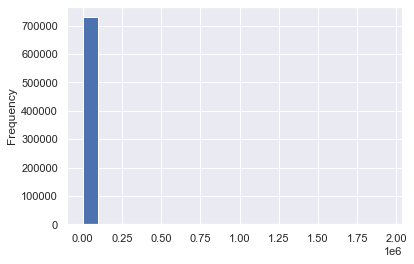

In [48]:
data["trip_duration"].plot(kind="hist", bins=20)   # Trip Duration 
plt.show 

In [49]:
data["trip_duration"].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

In [50]:
# here we see an outlier, so droppping an outlier
data.drop(data[data["trip_duration"]==1939736].index, inplace=True )



In [51]:
print(data["trip_duration"].sort_values(ascending=False))

259437    86391
119185    86387
177225    86378
496391    86377
90557     86369
          ...  
398887        1
95823         1
323299        1
533760        1
102646        1
Name: trip_duration, Length: 729321, dtype: int64


## Vendor_ID

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

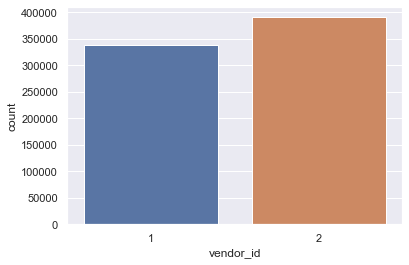

In [54]:
sns.countplot(x="vendor_id", data = data)    


## passenger_count 

In [55]:
data["passenger_count"].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

Here we see that some trips have passenger counts as 0 , 9, 7 which is not possible so we will delete such rows .

In [58]:
data.drop(data[data["passenger_count"]==0].index, inplace=True)
data.drop(data[data["passenger_count"]==9].index, inplace=True)
data.drop(data[data["passenger_count"]==7].index, inplace=True)

In [59]:
data["passenger_count"].value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

## Store  and Forward Flag 

In [69]:
data["store_and_fwd_flag"].value_counts(normalize=True)    # Less than one percent were stored 

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

## Distance

In [70]:
data['distance'].value_counts()

0.000000     2893
0.000424       21
0.000424       19
0.000424       18
0.001273       13
             ... 
0.626853        1
2.298744        1
11.986954       1
1.458075        1
0.566500        1
Name: distance, Length: 726216, dtype: int64

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.
The driver deliberately took this ride to complete a target ride number.
The passengers canceled the trip.
We will analyze these trips further in bivariate analysis.

## Trips per day

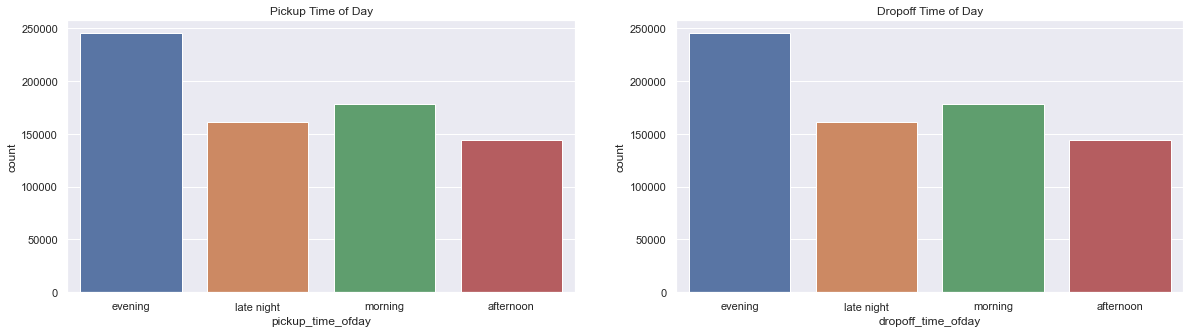

In [75]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_time_ofday",data=data,ax=ax1)
ax2.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_time_ofday",data=data,ax=ax2)

## Trips per Month 

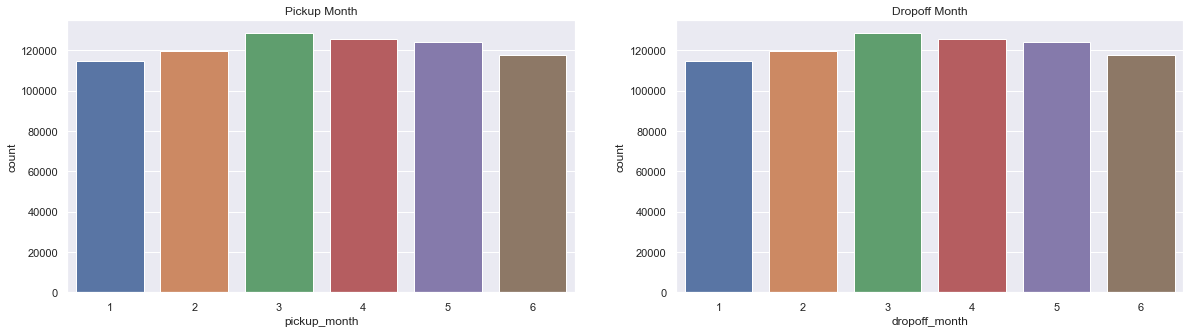

In [76]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax1)
ax2.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax2)

# Bivariate Analysis 
Here two variables will be taken into consideration.

## Trip Duration per Vendor 

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

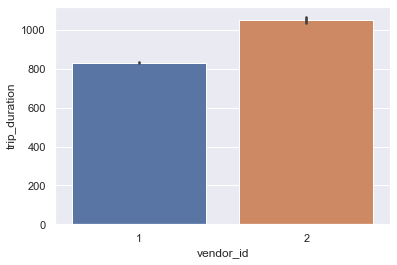

In [77]:
sns.barplot(x="vendor_id", y="trip_duration", data=data)


It is showing that Vendor 2 takes longer duration of trips .

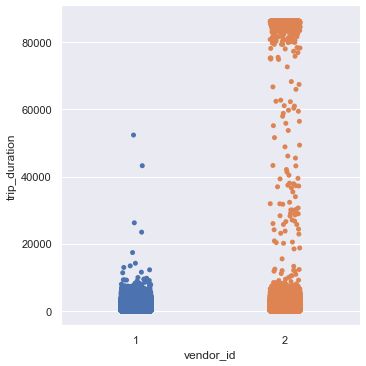

In [81]:
sns.catplot(y="trip_duration",x="vendor_id",data=data,kind="strip")

## Trip Duration per Store and Forward Flag

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='trip_duration'>

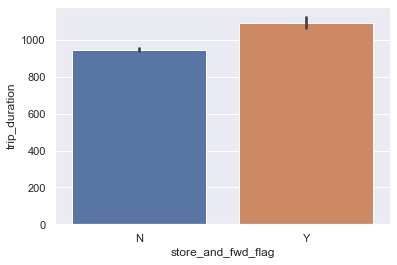

In [78]:
sns.barplot(x="store_and_fwd_flag", y="trip_duration", data = data )

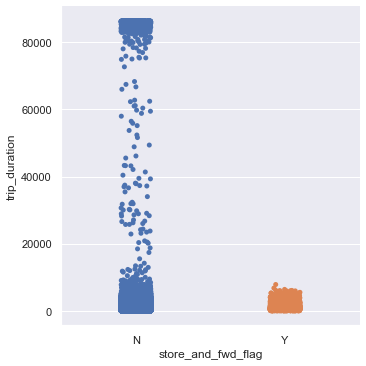

In [80]:
sns.catplot(y="trip_duration",x="store_and_fwd_flag",data=data,kind="strip")

1) Here  we can see that somtimes bar graph shows the comparison of data but both the values should be in same range therefore we go for category plot which shows the frequency of datapoints of the categories and gives more accurate result . 

2) Here we can conclude that trip duration is more for not stored categorie .


## Trip Duration per passenger count

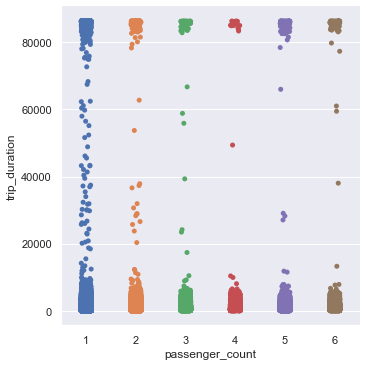

In [82]:
sns.catplot(y="trip_duration",x="passenger_count",data=data,kind="strip")

Here not a good relation between passenger count and trip duration.

## Trip duration per hour 


<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

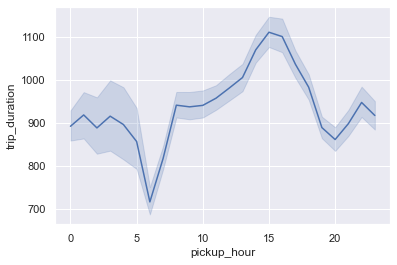

In [83]:
sns.lineplot(x="pickup_hour",y="trip_duration",data=data)

We see the trip duration is the maximum around 3 pm which may be because of traffic on the roads.
Trip duration is the lowest around 6 am as streets may not be busy.

## Trip Duration per time of day

<AxesSubplot:xlabel='pickup_time_ofday', ylabel='trip_duration'>

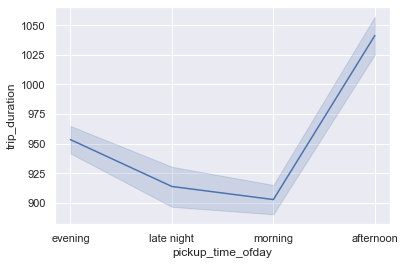

In [86]:
sns.lineplot(x="pickup_time_ofday",y="trip_duration",data=data)

Trip duration is the maximum in the afternoon and lowest between late night and morning.

## Trip Duration per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

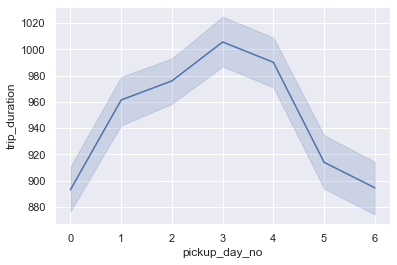

In [87]:
sns.lineplot(x="pickup_day_no",y="trip_duration",data=data)

Trip duration is the maximum in thursday and friday .(monday is 0 and sunday is 6)

## Trip Duration per month

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

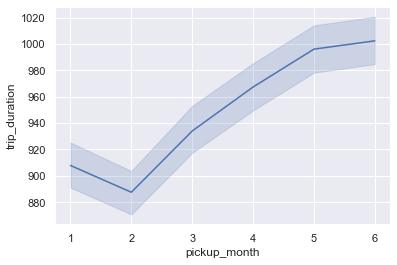

In [88]:
sns.lineplot(x="pickup_month",y="trip_duration",data=data)

From February trip duration is increasing .

## Distance and Vendor 

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

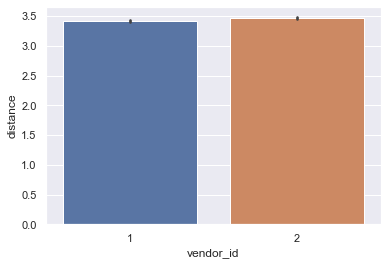

In [89]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

Almost same both the Vendors

## Distance and Store and Forward Flag

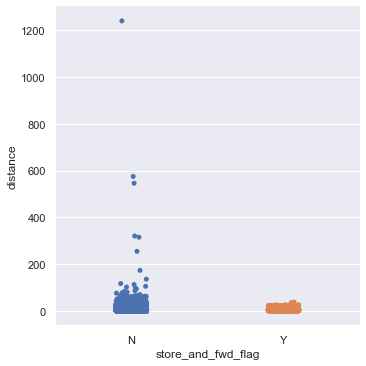

In [91]:
sns.catplot(y="distance",x="store_and_fwd_flag",data=data,kind="strip")

Longer for trips not stored.

## Distance per passenger count

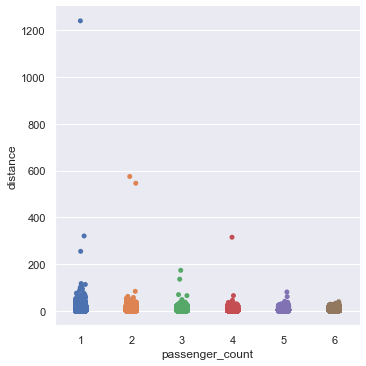

In [92]:
sns.catplot(y="distance",x="passenger_count",data=data,kind="strip")

 longer distances are covered by either 1 or 2 or 4 passenger rides.

 

## Distance per day of week

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

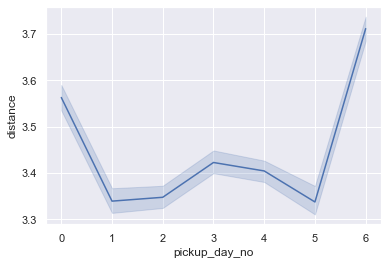

In [95]:
sns.lineplot(y="distance",x="pickup_day_no",data=data)

1) Distances are longer on Sundays probably because it’s weekend.
2) Monday trip distances are also quite high.
3) This probably means that there can be outstation trips on these days and/or the streets are busier.

## Distance per hour of day

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

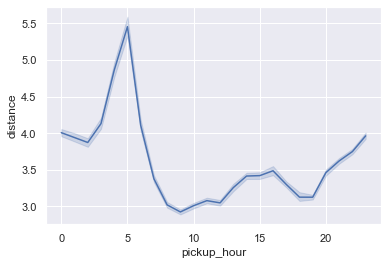

In [96]:
sns.lineplot(x='pickup_hour',y='distance',data=data)

Distances are the longest around 5 am.

## Distance per time of day

<AxesSubplot:xlabel='pickup_time_ofday', ylabel='distance'>

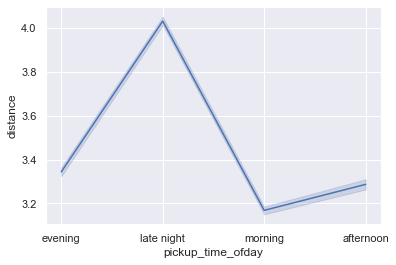

In [98]:
sns.lineplot(x='pickup_time_ofday',y='distance',data=data)

As seen above also, distances being the longest during late night or it maybe called as early morning too.
This can probably point to outstation trips where people start early for the day.

## Distance per month

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

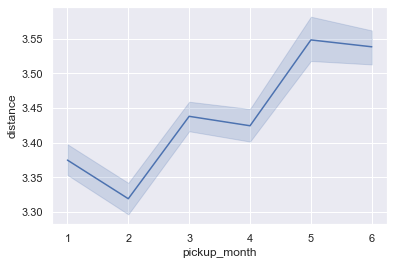

In [99]:
sns.lineplot(x='pickup_month',y='distance',data=data)

As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.

## Passenger Count and Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

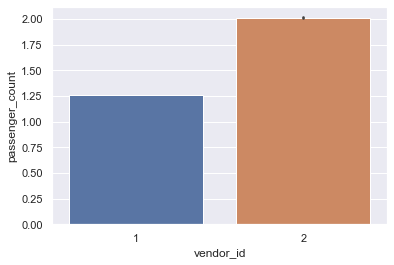

In [100]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

## Trip Duration and Distance

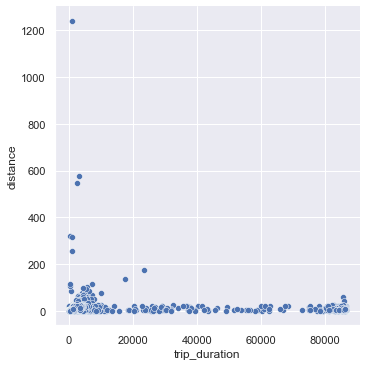

In [101]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

In [102]:
data[data["distance"]==0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_ofday,dropoff_time_ofday,distance
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:21:00,2,-73.996422,40.298828,-73.996422,40.298828,N,...,<bound method PandasDelegate._add_delegate_acc...,1,1,11,11,6,6,morning,morning,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:34:38,1,-73.996323,40.753460,-73.996323,40.753460,N,...,<bound method PandasDelegate._add_delegate_acc...,5,5,13,13,3,3,afternoon,afternoon,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 16:49:52,5,-73.967171,40.763500,-73.967171,40.763500,N,...,<bound method PandasDelegate._add_delegate_acc...,0,0,16,16,6,6,evening,evening,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:39:52,1,-73.995232,40.744038,-73.995232,40.744038,N,...,<bound method PandasDelegate._add_delegate_acc...,0,0,21,21,2,2,evening,evening,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 11:38:36,2,-73.912781,40.804428,-73.912781,40.804428,N,...,<bound method PandasDelegate._add_delegate_acc...,6,6,11,11,3,3,morning,morning,0.0


In [103]:
data[data["distance"]==0].tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_ofday,dropoff_time_ofday,distance
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:43,2,-73.977898,40.766392,-73.977898,40.766392,N,...,<bound method PandasDelegate._add_delegate_acc...,3,3,21,21,5,5,evening,evening,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:06:40,1,-73.974258,40.759895,-73.974258,40.759895,N,...,<bound method PandasDelegate._add_delegate_acc...,6,6,20,20,3,3,evening,evening,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:04:32,2,-73.984558,40.750839,-73.984558,40.750839,N,...,<bound method PandasDelegate._add_delegate_acc...,6,6,4,4,5,5,late night,late night,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:03:34,1,-74.083611,40.632401,-74.083611,40.632401,N,...,<bound method PandasDelegate._add_delegate_acc...,2,2,18,18,4,4,evening,evening,0.0
729308,id3477255,2,2016-01-20 08:22:38,2016-01-20 08:22:38,1,-73.977859,40.749538,-73.977859,40.749538,N,...,<bound method PandasDelegate._add_delegate_acc...,2,2,8,8,1,1,morning,morning,0.0


We can see even though distance is recorded as 0 but trip duration is definitely more.

1) One reason can be that the dropoff coordinates weren’t recorded.
2) Another reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

## Therefore EDA helps us to see the underlying patterns present in our data so we draw some conclusions from these pattern before building the model .